# Machine Learning

# Customer Spend Prediction using Simple Linear Regression

## Problem Statement

- Simple problem to illustrate linear regression modelling
- Illustrate key concepts for linear regression by adding a model that will predict customer spend based on day of the week

## Workbench

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodel
import statsmodels.formula.api as smf
#import metrics
from statsmodels.tools.eval_measures import rmse
import warnings

#notebook configurations
%matplotlib inline
sns.set(color_codes=True)
warnings.filterwarnings('ignore')

In [2]:
supermarket= pd.read_csv('supermarket_till_transactions.csv')
supermarket

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200607,20060413,5,20,1,103,PRD0900097,CL00001,DEP00001,G00001,...,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02
1,200607,20060412,4,19,1,28,PRD0900353,CL00070,DEP00020,G00007,...,LA,YF,994100100532897,M,MM,Small Shop,Fresh,STORE00001,LS,E02
2,200607,20060413,5,20,3,84,PRD0900550,CL00167,DEP00055,G00016,...,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02
3,200607,20060412,4,19,1,221,PRD0901647,CL00010,DEP00003,G00002,...,LA,YF,994100100532897,M,MM,Small Shop,Fresh,STORE00001,LS,E02
4,200607,20060413,5,20,1,334,PRD0902064,CL00073,DEP00021,G00007,...,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,200607,20060410,2,10,3,729,PRD0900382,CL00235,DEP00083,G00028,...,LA,OA,994100100237590,M,MM,Small Shop,Grocery,STORE02451,XLS,S03
115,200607,20060414,6,19,1,485,PRD0900114,CL00237,DEP00084,G00028,...,LA,OA,994100100540327,M,MM,Small Shop,Grocery,STORE02847,LS,N01
116,200607,20060414,6,19,1,450,PRD0900624,CL00237,DEP00084,G00028,...,LA,OA,994100100540327,M,MM,Small Shop,Grocery,STORE02847,LS,N01
117,200607,20060414,6,19,1,154,PRD0901219,CL00160,DEP00054,G00016,...,LA,OA,994100100540327,M,MM,Small Shop,Grocery,STORE02847,LS,N01


In [3]:
supermarket.head(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200607,20060413,5,20,1,103,PRD0900097,CL00001,DEP00001,G00001,...,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02
1,200607,20060412,4,19,1,28,PRD0900353,CL00070,DEP00020,G00007,...,LA,YF,994100100532897,M,MM,Small Shop,Fresh,STORE00001,LS,E02
2,200607,20060413,5,20,3,84,PRD0900550,CL00167,DEP00055,G00016,...,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02
3,200607,20060412,4,19,1,221,PRD0901647,CL00010,DEP00003,G00002,...,LA,YF,994100100532897,M,MM,Small Shop,Fresh,STORE00001,LS,E02
4,200607,20060413,5,20,1,334,PRD0902064,CL00073,DEP00021,G00007,...,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02


#### Getting fields we are interested in

In [4]:
weekday= supermarket[["SHOP_WEEKDAY","SPEND"]]
weekday.head(5)

,SHOP_WEEKDAY,SPEND
0,5,103
1,4,28
2,5,84
3,4,221
4,5,334


#### Beta as cov(x,y)/var(x)

In [5]:
X= weekday["SHOP_WEEKDAY"]
y= weekday["SPEND"]

In [6]:
# mean of x and y
xmean= np.mean(X)
ymean= np.mean(y)

In [7]:
# calculate terms for numerator and denominator of beta
weekday['xycov']=(weekday["SHOP_WEEKDAY"]- xmean)*(weekday["SPEND"]-ymean)
weekday['xvar']=(weekday['SHOP_WEEKDAY']-xmean)**2

In [8]:
weekday.head(5)

,SHOP_WEEKDAY,SPEND,xycov,xvar
0,5,103,-77.388885,0.597698
1,4,28,39.728762,0.051479
2,5,84,-92.077961,0.597698
3,4,221,-4.061154,0.051479
4,5,334,101.199350,0.597698


In [9]:
# calculate beta and alpha
beta= weekday['xycov'].sum()/weekday['xvar'].sum()
alpha= ymean-(beta*xmean)

In [10]:
# view alpha and beta values
print(f'alpha={alpha}')
print(f'beta={beta}')

alpha=330.09788218544224
beta=-30.045025805303435


#### do predictions using values found

In [11]:
ypred= alpha + beta*X

In [12]:
ypred

0      179.872753
1      209.917779
2      179.872753
3      209.917779
4      179.872753
          ...    
114    270.007831
115    149.827727
116    149.827727
117    149.827727
118    149.827727
Name: SHOP_WEEKDAY, Length: 119, dtype: float64

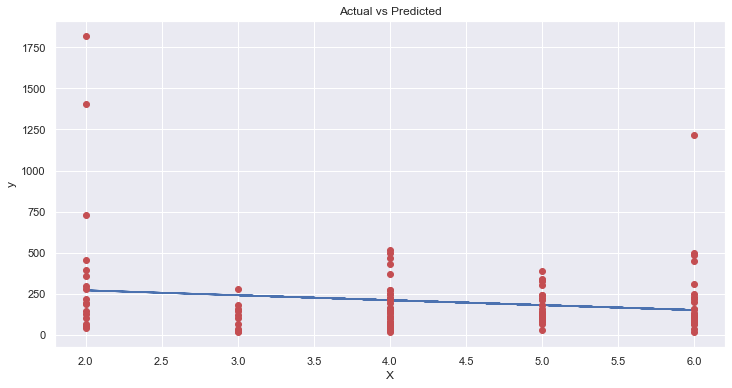

In [13]:
# plot regression against actual data
plt.figure(figsize=(12,6))
plt.plot(X, ypred)
plt.plot(X,y,'ro')
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

The blue line is the best line of fit i.e. Y=330.098+-30.045X

#### Using Stats Model's Ordinary Least Squares Method

In [14]:
# Initialize and fit linear regression model using 'stats models'
stats_model= smf.ols('SPEND~SHOP_WEEKDAY',data=supermarket)
stats_model=stats_model.fit()
#ols-ordinary least squares

#### We confirm the parameters

In [15]:
stats_model.params

Intercept       330.097882
SHOP_WEEKDAY    -30.045026
dtype: float64

In [16]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SPEND   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.797
Date:                Mon, 06 Apr 2020   Prob (F-statistic):             0.0971
Time:                        11:09:01   Log-Likelihood:                -823.42
No. Observations:                 119   AIC:                             1651.
Df Residuals:                     117   BIC:                             1656.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      330.0979     79.239      4.166      0.000     173.169     487.027
SHOP_WEEKDAY   -30.0450     17.965     -1.672      0.097     -65.625       5.535
==============================================================================
Omnibus:                      125.423   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1847.385
Skew:                           3.748   Prob(JB):                         0.00
Kurtosis:                      20.787   Cond. No.                         16.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
stats_model1= smf.ols('SPEND~SHOP_WEEKDAY+SHOP_HOUR+QUANTITY',data=supermarket)
stats_model1=stats_model1.fit()

In [18]:
stats_model1.params

Intercept       366.801757
SHOP_WEEKDAY    -18.779187
SHOP_HOUR       -12.306012
QUANTITY         53.434573
dtype: float64

In [19]:
stats_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SPEND   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     5.240
Date:                Mon, 06 Apr 2020   Prob (F-statistic):            0.00200
Time:                        11:12:06   Log-Likelihood:                -817.20
No. Observations:                 119   AIC:                             1642.
Df Residuals:                     115   BIC:                             1654.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      366.8018     93.598      3.919      0.000     181.402     552.202
SHOP_WEEKDAY   -18.7792     18.221     -1.031      0.305     -54.872      17.313
SHOP_HOUR      -12.3060      5.712     -2.154      0.033     -23.621      -0.991
QUANTITY        53.4346     17.801      3.002      0.003      18.175      88.695
==============================================================================
Omnibus:                      119.230   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1503.081
Skew:                           3.549   Prob(JB):                         0.00
Kurtosis:                      18.898   Cond. No.                         64.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
rmse= rmse(y, ypred)
rmse
#root mean squared error

244.81829310949846

# Class 2

In [22]:
weekday1=supermarket[["SHOP_WEEKDAY","SHOP_HOUR","QUANTITY","SPEND"]]
weekday1.head(5)

,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND
0,5,20,1,103
1,4,19,1,28
2,5,20,3,84
3,4,19,1,221
4,5,20,1,334


Text(0.5, 1.08, 'LEAST SQUARE')

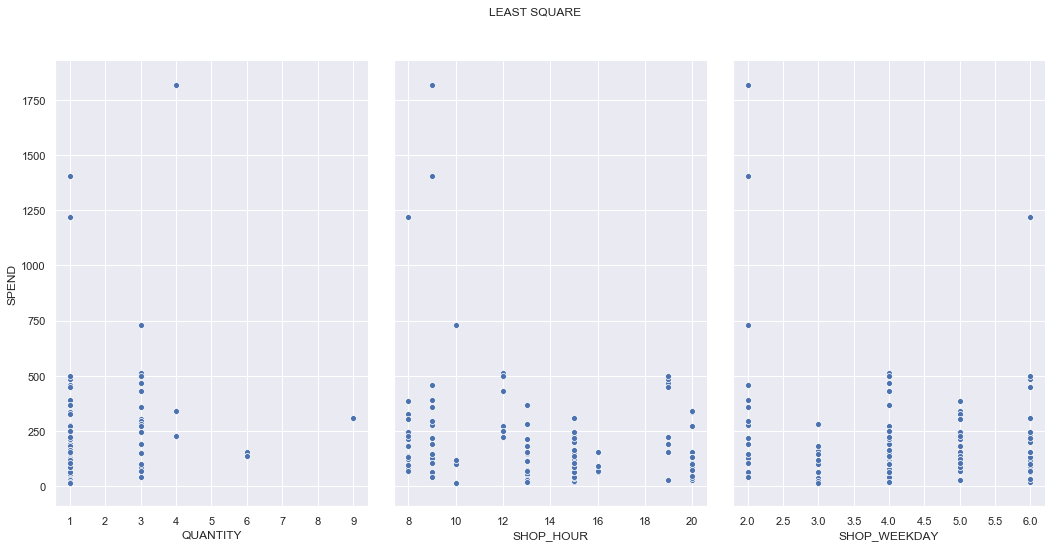

In [25]:
fig1=sns.pairplot(supermarket, x_vars=['QUANTITY','SHOP_HOUR','SHOP_WEEKDAY'], y_vars='SPEND', height=7, aspect=0.7)
fig1.fig.suptitle("LEAST SQUARE",y=1.08)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats as stats
import pylab

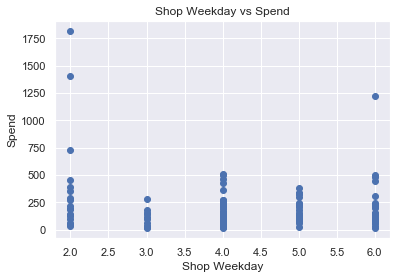

In [30]:
plt.plot(supermarket['SHOP_WEEKDAY'],supermarket['SPEND'],'o')
plt.title('Shop Weekday vs Spend')
plt.xlabel('Shop Weekday')
plt.ylabel('Spend')
plt.show()

In [31]:
#this is because we are using a single feature which is SHOP_WEEKDAY
X_reshaped=supermarket['SHOP_WEEKDAY'].values.reshape(-1,1)
y_reshaped= supermarket['SPEND'].values.reshape(-1,1)

In [32]:
x_train, x_test, y_train, y_test= train_test_split(X_reshaped, y_reshaped,test_size=0.2, random_state=0)

In [33]:
#initialize the algorithm
regressor= LinearRegression()

In [34]:
#train the algorithm
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
#retrieve the intercept
print(regressor.intercept_)

[241.44855673]


In [36]:
#to retrieve the slope
print(regressor.coef_)

[[-11.47570734]]


In [37]:
# mqke predictions using the test sample
y_pred= regressor.predict(x_test)

In [38]:
comparison= pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
comparison

,Actual,Predicted
0,456,218.497142
1,245,195.545727
2,151,195.545727
3,27,184.070020
4,99,195.545727
5,118,172.594313
6,192,195.545727
7,129,184.070020
8,97,184.070020
9,103,195.545727


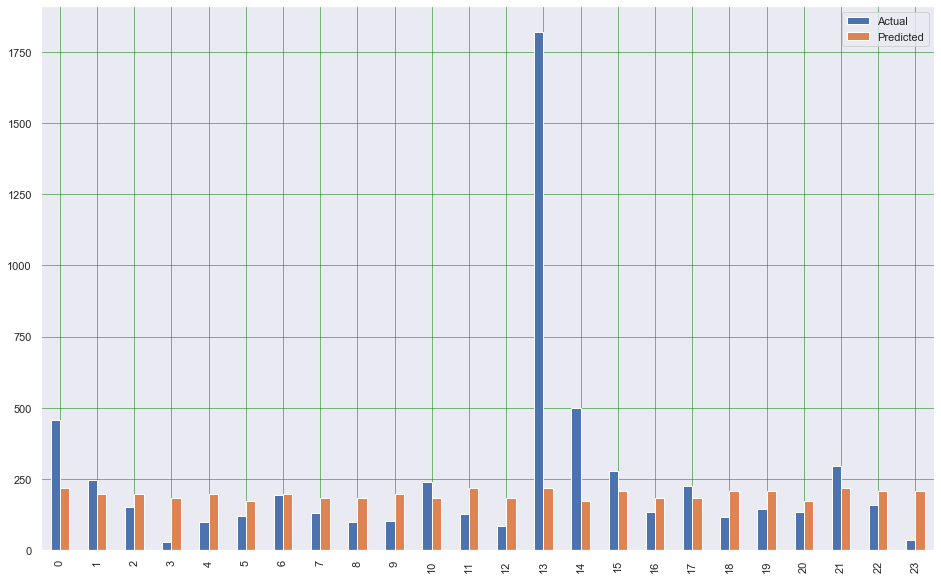

In [41]:
#visualize the predicted agaisnt actual values
comparison.plot(kind='bar', figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':',linewidth='0.5',color='black')
plt.show()

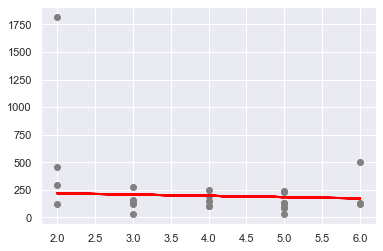

In [43]:
#plotting the line of best fit
plt.scatter(x_test,y_test, color='gray')
plt.plot(x_test, y_pred,color='red', linewidth=2)
plt.show()

### Evaluation metrics

In [44]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 154.56298228065162
Mean Squared Error: 119627.93505511161
Root Mean Squared Error: 345.8727151064559


### Collect the residuals

In [45]:
residuals= stats_model.resid

In [46]:
residuals

0      -76.872753
1     -181.917779
2      -95.872753
3       11.082221
4      154.127247
          ...    
114    458.992169
115    335.172273
116    300.172273
117      4.172273
118    349.172273
Length: 119, dtype: float64

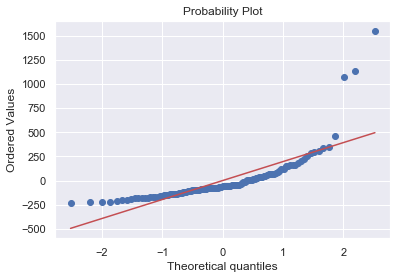

In [47]:
stats.probplot(residuals,dist="norm",plot=pylab)
pylab.show()

In [49]:
homo_hetero=pd.DataFrame({'Residuals':residuals, 'ShopWeekday': supermarket['SHOP_WEEKDAY']})
homo_hetero.head(5)

,Residuals,ShopWeekday
0,-76.872753,5
1,-181.917779,4
2,-95.872753,5
3,11.082221,4
4,154.127247,5


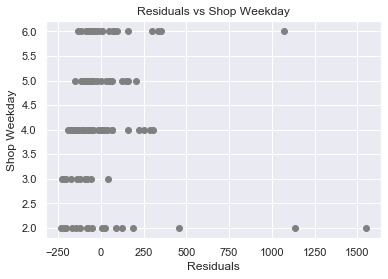

In [51]:
plt.scatter(homo_hetero["Residuals"], homo_hetero["ShopWeekday"],color='gray')
plt.title('Residuals vs Shop Weekday')
plt.xlabel('Residuals')
plt.ylabel('Shop Weekday')
plt.show()